In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def mean_squared_error(y_true, y_pred):
    cost = np.sum((y_true - y_pred) ** 2) / len(y_true)
    return cost

In [5]:
def gradient_descent(x, y, iterations = 1000, learning_rate = 0.0001, 
                     stopping_threshold = 1e-6):
    current_weight = 0.1
    current_bias = 0.01
    iterations = iterations
    learning_rate = learning_rate
    n = float(len(x))
    
    costs = []
    weight = []
    previous_cost = None
    
    for i in range(iterations):
        y_pred = current_weight * x + current_bias
        current_cost = mean_squared_error(y, y_pred)
        
        if previous_cost and abs(previous_cost - current_cost) <= stopping_threshold:
            break
        previous_cost = current_cost
        
        costs.append(current_cost)
        weight.append(current_weight)
        
        weight_derivate = - (2/n) * sum(x * (y-y_pred))
        bias_derivate = current_bias - sum(y-y_pred)
        
        current_weight = current_weight - (learning_rate * weight_derivate)
        current_bias = current_bias - (learning_rate * bias_derivate)
        
        print(f"Iteration {i+1}: Cost {current_cost}, Weight \ {current_weight}, Bias {current_bias}")
    plt.figure(figsize = (8,6))
    plt.plot(weight, costs)
    plt.scatter(weight, costs, marker='o', color='red')
    plt.title("Cost vs Weights")
    plt.ylabel("Cost")
    plt.xlabel("Weight")
    plt.show()

    return current_weight, current_bias
    

Iteration 1: Cost 4352.088931274409, Weight \ 0.7593291142562117, Bias 0.1388548130709
Iteration 2: Cost 1107.5698362575245, Weight \ 1.0804441201605581, Bias 0.20155465091211658
Iteration 3: Cost 337.97079186502964, Weight \ 1.236838276534512, Bias 0.23203495484746195
Iteration 4: Cost 155.4218928772835, Weight \ 1.3130082269162795, Bias 0.24682334622729896
Iteration 5: Cost 112.12118497786801, Weight \ 1.350106479580384, Bias 0.2539692935961401
Iteration 6: Cost 101.85017598202646, Weight \ 1.368175593217574, Bias 0.2573931399038528
Iteration 7: Cost 99.41384376333721, Weight \ 1.3769769207979494, Bias 0.2590042147856367
Iteration 8: Cost 98.83591695767525, Weight \ 1.3812645465318814, Bias 0.2597324214923218
Iteration 9: Cost 98.69881473808753, Weight \ 1.383353858127267, Bias 0.26003065199122155
Iteration 10: Cost 98.66628162745626, Weight \ 1.3843725218181717, Bias 0.2601194788347005
Iteration 11: Cost 98.65855505490613, Weight \ 1.3848697463315578, Bias 0.2601063277535968
Iterati

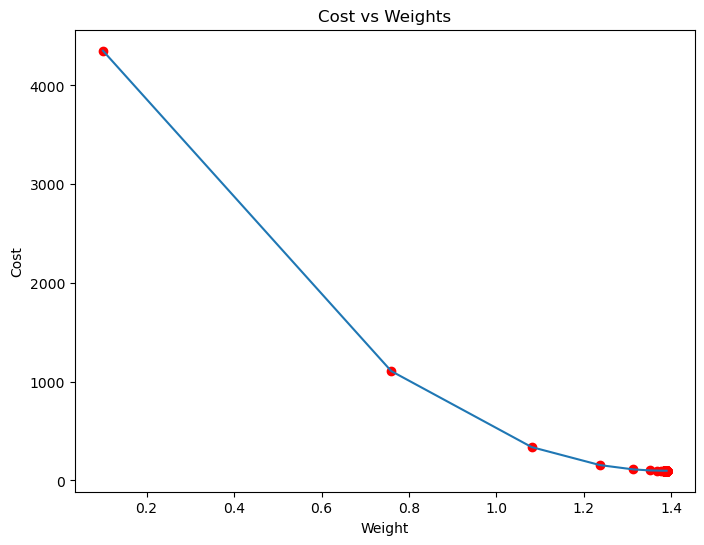

Estimated Weight: 1.3890552690122626
Estimated Bias: 0.07024608941183631


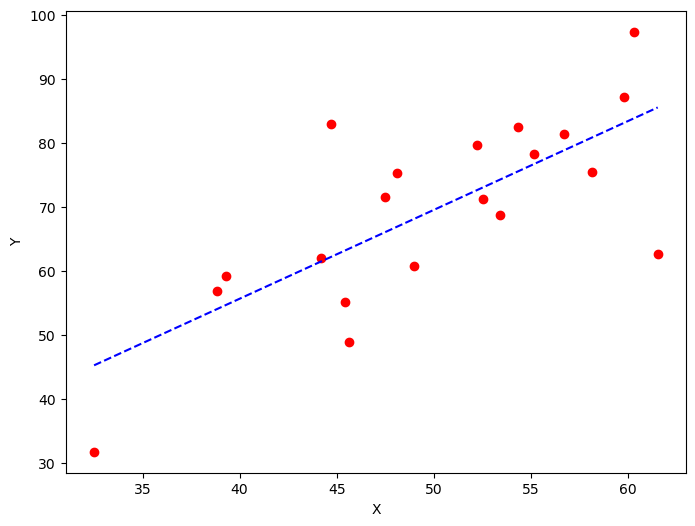

In [6]:
def main():

    # Data
    X = np.array([32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787,
                  55.14218841, 52.21179669, 39.29956669, 48.10504169, 52.55001444,
                  45.41973014, 54.35163488, 44.1640495 , 58.16847072, 56.72720806,
                  48.95588857, 44.68719623, 60.29732685, 45.61864377, 38.81681754])
    Y = np.array([31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513,
                  78.21151827, 79.64197305, 59.17148932, 75.3312423 , 71.30087989,
                  55.16567715, 82.47884676, 62.00892325, 75.39287043, 81.43619216,
                  60.72360244, 82.89250373, 97.37989686, 48.84715332, 56.87721319])

    # Estimating weight and bias using gradient descent
    estimated_weight, estimated_bias = gradient_descent(X, Y, iterations=2000)
    print(f"Estimated Weight: {estimated_weight}\nEstimated Bias: {estimated_bias}")

    # Making predictions using estimated parameters
    Y_pred = estimated_weight*X + estimated_bias

    # Plotting the regression line
    plt.figure(figsize = (8,6))
    plt.scatter(X, Y, marker='o', color='red')
    plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='blue',markerfacecolor='red',
             markersize=10,linestyle='dashed')
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()


if __name__=="__main__":
    main()